In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import zscore
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Treating null values

In [7]:
# Filling nulls in Age feature
df['Age']=df['Age'].fillna(df.groupby('Sex')['Age'].transform('mean'))

In [8]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# Filling nulls in Cabin feature
df['Cabin'].value_counts()
df['Cabin']=df['Cabin'].apply(lambda x: str(x)[0])
df['Cabin'].value_counts()

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [10]:
df['Cabin']=df['Cabin'].apply(lambda x: str(0) if (x=='n') else x)
df['Cabin']

0      0
1      C
2      0
3      C
4      0
      ..
886    0
887    B
888    0
889    C
890    0
Name: Cabin, Length: 891, dtype: object

In [11]:
# Filling nulls in Embarked feature by mode
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [12]:
df['Embarked']=df['Embarked'].fillna('S')

## Analyse relation of categorical features with label

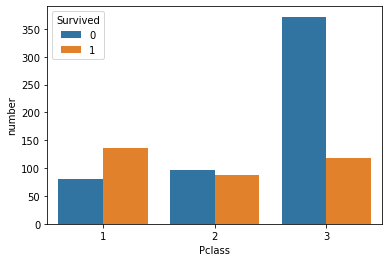

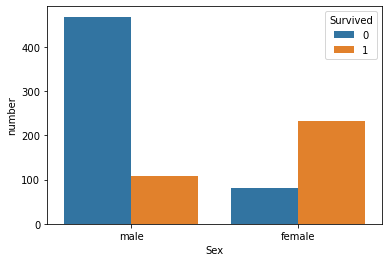

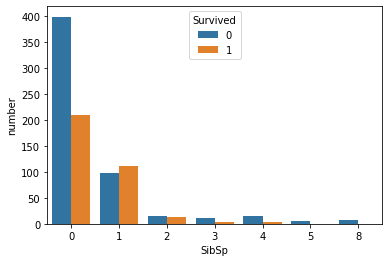

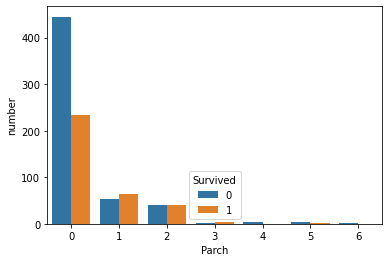

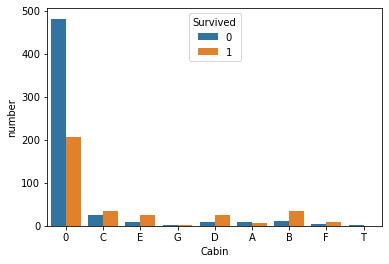

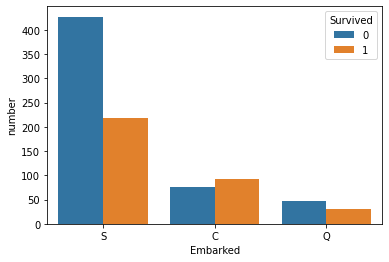

In [13]:
cols=['Pclass','Sex','SibSp','Parch','Cabin','Embarked']
for i in cols:
    sns.countplot(x=i,hue='Survived',data=df)
    plt.xlabel(i)
    plt.ylabel("number")
    plt.show()

conclusion::Passenger travelling in class 1 survived the most. Females survived more then males.Perople having sibling and a parent survived the tragedy. People travelling in cabin B has higher chance of survival and people boarded from terminal C has higher chance of survival.

## Visualizing numerical features

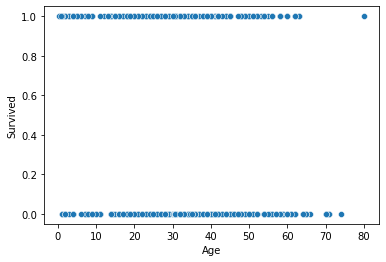

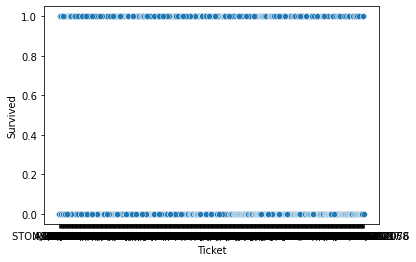

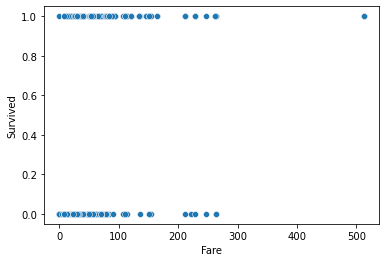

In [14]:
col=['Age','Ticket','Fare']
for i in col:
    sns.scatterplot(x=i,y='Survived',data=df)
    plt.xlabel(i)
    plt.ylabel("Survived")
    plt.show()

## Encoding

In [15]:
# encoding sex
oe=OrdinalEncoder()
df1=oe.fit_transform(df[['Sex']])
df['Sex']=df1
df2=oe.fit_transform(df[['Cabin']])
df['Cabin']=df2
df3=oe.fit_transform(df[['Embarked']])
df['Embarked']=df3
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1.0,22.0,1,0,A/5 21171,7.2500,0.0,2.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,38.0,1,0,PC 17599,71.2833,3.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",0.0,26.0,0,0,STON/O2. 3101282,7.9250,0.0,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,35.0,1,0,113803,53.1000,3.0,2.0
4,5,0,3,"Allen, Mr. William Henry",1.0,35.0,0,0,373450,8.0500,0.0,2.0


conclusion:: Most of the people below the 40 years survived and higher the fare higher the chances of survival.

## Finding correlation 

In [16]:
df.corr().abs()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,1.000000,0.005007,0.035144,0.042939,0.035543,0.057527,0.001652,0.012658,0.000483,0.013128
Survived,0.005007,1.000000,0.338481,0.543351,0.080453,0.035322,0.081629,0.257307,0.287944,0.167675
Pclass,0.035144,0.338481,1.000000,0.131900,0.330391,0.083081,0.018443,0.549500,0.570691,0.162098
Sex,0.042939,0.543351,0.131900,1.000000,0.103236,0.114631,0.245489,0.182333,0.143517,0.108262
Age,0.035543,0.080453,0.330391,0.103236,1.000000,0.236920,0.182556,0.089079,0.166653,0.024352
SibSp,0.057527,0.035322,0.083081,0.114631,0.236920,1.000000,0.414838,0.159651,0.031973,0.068230
Parch,0.001652,0.081629,0.018443,0.245489,0.182556,0.414838,1.000000,0.216225,0.037621,0.039798
Fare,0.012658,0.257307,0.549500,0.182333,0.089079,0.159651,0.216225,1.000000,0.337525,0.224719
Cabin,0.000483,0.287944,0.570691,0.143517,0.166653,0.031973,0.037621,0.337525,1.000000,0.080523
Embarked,0.013128,0.167675,0.162098,0.108262,0.024352,0.068230,0.039798,0.224719,0.080523,1.000000


<AxesSubplot:>

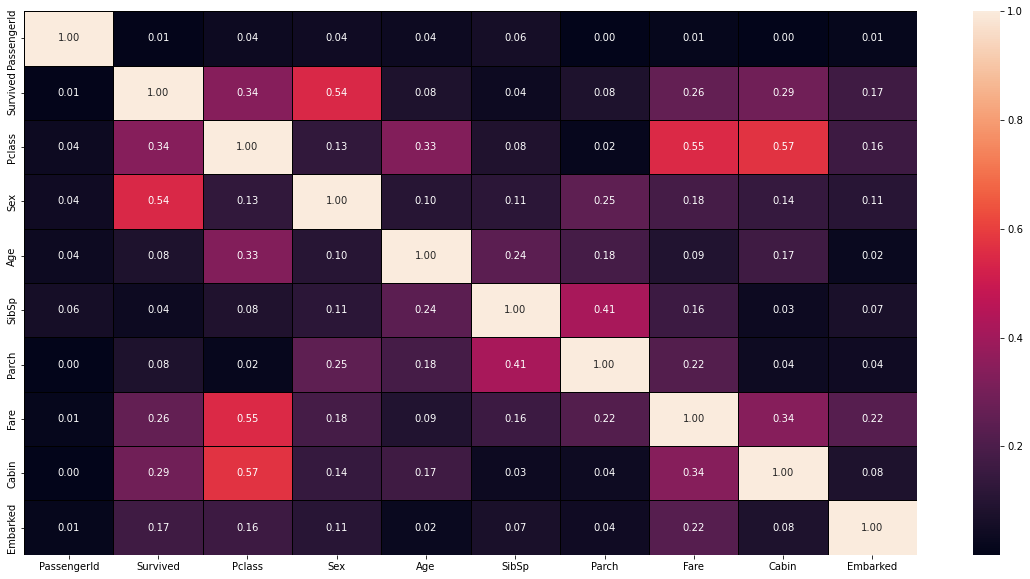

In [17]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr().abs(),annot=True,linewidth=0.5,linecolor='black',fmt='.2f')

conclusion::Multicollinearity doesnot exists.

We can simply combine SibSp and Parch column as both of them shows that passenger is either travelling alone or with family. So we will make one column out of it,

In [18]:
df['relation']=df['SibSp']+df['Parch']
df.loc[df['relation']>0,'Family']=1
df.loc[df['relation']==0,'Family']=0
df['relation'].astype('int')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relation,Family
0,1,0,3,"Braund, Mr. Owen Harris",1.0,22.0,1,0,A/5 21171,7.2500,0.0,2.0,1,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,38.0,1,0,PC 17599,71.2833,3.0,0.0,1,1.0
2,3,1,3,"Heikkinen, Miss. Laina",0.0,26.0,0,0,STON/O2. 3101282,7.9250,0.0,2.0,0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,35.0,1,0,113803,53.1000,3.0,2.0,1,1.0
4,5,0,3,"Allen, Mr. William Henry",1.0,35.0,0,0,373450,8.0500,0.0,2.0,0,0.0


We dont need name, ticket, SibSp,Parch now so we will drop it.

In [19]:
x=df.drop(['PassengerId','Name','Ticket','SibSp','Parch','relation','Survived'],axis=1)
y=df['Survived']

In [20]:
x.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Family
0,3,1.0,22.0,7.2500,0.0,2.0,1.0
1,1,0.0,38.0,71.2833,3.0,0.0,1.0
2,3,0.0,26.0,7.9250,0.0,2.0,0.0
3,1,0.0,35.0,53.1000,3.0,2.0,1.0
4,3,1.0,35.0,8.0500,0.0,2.0,0.0


## Checking skewness

In [21]:
x.skew()

Pclass     -0.630548
Sex        -0.618921
Age         0.424586
Fare        4.787317
Cabin       1.991925
Embarked   -1.264823
Family      0.420431
dtype: float64

conclusion:: Fare being continuous data is right skewed.

<AxesSubplot:xlabel='Fare', ylabel='Density'>

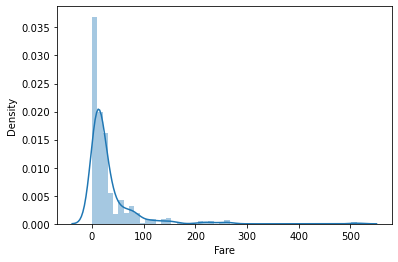

In [22]:
#Ploting dist graph for fare
sns.distplot(x['Fare'])

It is highly right skewed.

## Checking outliers

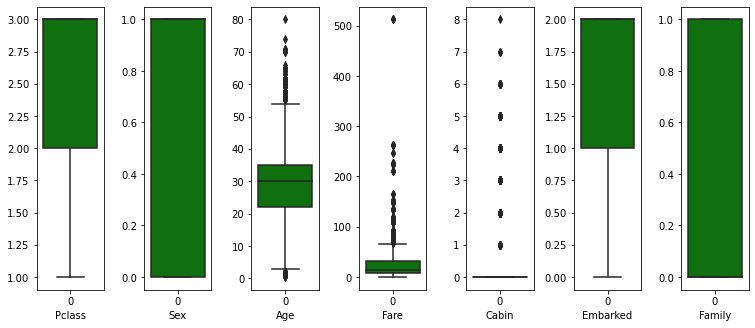

In [23]:

col=x.columns
plt.figure(figsize=(30,90))
for i in range(len(col)):
    plt.subplot(20,20,i+1)
    sns.boxplot(data=df[col[i]],color='green',orient='v')
    plt.xlabel(col[i])
    plt.tight_layout()

conclusion:: We could see outlier in Age and Fare feature. Cabin is a categorical feature so cannot consider it.

## Treating outlier

In [24]:
df_z=pd.DataFrame()
df_z['Age']=x['Age']
df_z['Fare']=x['Fare']
z=np.abs(zscore(df_z))
i=np.where(z>3)
print("Outliers index-\n",set(i[0]))
print("\n\nNumber of rows to be eliminated-\n",len(set(i[0])))

Outliers index-
 {258, 779, 527, 27, 672, 679, 299, 557, 689, 438, 311, 700, 716, 851, 341, 88, 730, 96, 737, 742, 745, 493, 116, 118, 630, 377, 380}


Number of rows to be eliminated-
 27


In [25]:
#Calculating Data Loss
loss=((891-27)/891)*100
print("The data loss-",100-loss,"%")

The data loss- 3.030303030303031 %


If we drop 27 rows there will be 3% data loss which is bearable. So we will drop these rows.

In [26]:
#removing rows with outliers
x=x.drop(x.index[i[0]])
x

,Pclass,Sex,Age,Fare,Cabin,Embarked,Family
0,3,1.0,22.000000,7.2500,0.0,2.0,1.0
1,1,0.0,38.000000,71.2833,3.0,0.0,1.0
2,3,0.0,26.000000,7.9250,0.0,2.0,0.0
3,1,0.0,35.000000,53.1000,3.0,2.0,1.0
4,3,1.0,35.000000,8.0500,0.0,2.0,0.0
...,...,...,...,...,...,...,...
886,2,1.0,27.000000,13.0000,0.0,2.0,0.0
887,1,0.0,19.000000,30.0000,2.0,2.0,0.0
888,3,0.0,27.915709,23.4500,0.0,2.0,1.0
889,1,1.0,26.000000,30.0000,3.0,0.0,0.0


In [27]:
y=y.drop(y.index[i[0]])
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 864, dtype: int64

## Treating Skewness

In [28]:
#using yeo-johnson transformation
from sklearn.preprocessing import power_transform
x['Fare']=power_transform(x[['Fare']],method='yeo-johnson')
x.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Family
0,3,1.0,22.0,-0.882769,0.0,2.0,1.0
1,1,0.0,38.0,1.529038,3.0,0.0,1.0
2,3,0.0,26.0,-0.792444,0.0,2.0,0.0
3,1,0.0,35.0,1.216581,3.0,2.0,1.0
4,3,1.0,35.0,-0.776493,0.0,2.0,0.0


In [29]:
x.skew()

Pclass     -0.708375
Sex        -0.632203
Age         0.229679
Fare       -0.009095
Cabin       2.067197
Embarked   -1.328443
Family      0.436684
dtype: float64

## Standardization

In [30]:
scaler=StandardScaler()
x=scaler.fit_transform(x)
x

array([[ 0.8017188 ,  0.7330529 , -0.58878329, ..., -0.46930674,
         0.57215883,  1.24144129],
       [-1.64161469, -1.36415804,  0.69141931, ...,  1.41373206,
        -2.00255591,  1.24144129],
       [ 0.8017188 , -1.36415804, -0.26873264, ..., -0.46930674,
         0.57215883, -0.80551534],
       ...,
       [ 0.8017188 , -1.36415804, -0.11545168, ..., -0.46930674,
         0.57215883,  1.24144129],
       [-1.64161469,  0.7330529 , -0.26873264, ...,  1.41373206,
        -2.00255591, -0.80551534],
       [ 0.8017188 ,  0.7330529 ,  0.21134334, ..., -0.46930674,
        -0.71519854, -0.80551534]])

## Train test split

In [31]:
from sklearn.linear_model import LogisticRegression
max_ac=0
randomState=0
lr=LogisticRegression()
for i in range(500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("\n\nAt random state:",i)
        print("\nTrain Accuracy- ",round(accuracy_score(y_train,pred_train)*100,1))
        print("\nTest Accuracy- ",round(accuracy_score(y_test,pred_test)*100,1))
        if round(accuracy_score(y_test,pred_test)*100,1)>max_ac:
            randomState=i
            max_ac=round(accuracy_score(y_test,pred_test)*100,1)
print("\n\n Best accuracy at random state-",randomState)



At random state: 17

Train Accuracy-  80.3

Test Accuracy-  80.3


At random state: 88

Train Accuracy-  80.3

Test Accuracy-  80.3


At random state: 121

Train Accuracy-  80.3

Test Accuracy-  80.3


At random state: 233

Train Accuracy-  80.9

Test Accuracy-  80.9


At random state: 259

Train Accuracy-  80.3

Test Accuracy-  80.3


At random state: 275

Train Accuracy-  80.3

Test Accuracy-  80.3


At random state: 323

Train Accuracy-  80.9

Test Accuracy-  80.9


At random state: 330

Train Accuracy-  80.9

Test Accuracy-  80.9


At random state: 412

Train Accuracy-  80.3

Test Accuracy-  80.3


 Best accuracy at random state- 233


## Logistic Regression

In [47]:
lr=LogisticRegression()
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=34,test_size=0.20)
lr.fit(x_train,y_train)
pred_train=lr.predict(x_train)
pred_test=lr.predict(x_test)
train_acc=round(accuracy_score(y_train,pred_train)*100,1)
test_acc=round(accuracy_score(y_test,pred_test)*100,1)
print("\nTrain Accuracy- ",train_acc)
print("\nTest Accuracy- ",test_acc)


Train Accuracy-  79.7

Test Accuracy-  80.3


## AUC-ROC Curve

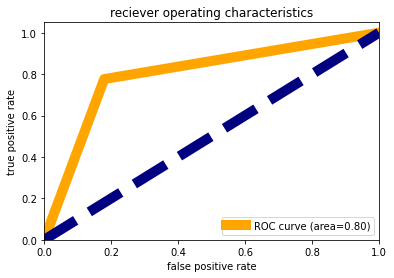

In [48]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='orange',lw=10,label="ROC curve (area=%0.2f)"%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("reciever operating characteristics")
plt.legend(loc="lower right")
plt.show()

## Random Forest Classifier

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
rf=RandomForestClassifier()

In [35]:
max_ac=0
randomState=0

for i in range(40):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.25)
    rf.fit(x_train,y_train)
    pred_train=rf.predict(x_train)
    pred_test=rf.predict(x_test)
    
    print("\n\nAt random state:",i)
    print("\nTrain Accuracy- ",round(accuracy_score(y_train,pred_train)*100,1))
    print("\nTest Accuracy- ",round(accuracy_score(y_test,pred_test)*100,1))
        
print("\n\n Best accuracy at random state-",randomState)



At random state: 0

Train Accuracy-  99.2

Test Accuracy-  79.2


At random state: 1

Train Accuracy-  99.1

Test Accuracy-  77.3


At random state: 2

Train Accuracy-  98.6

Test Accuracy-  79.2


At random state: 3

Train Accuracy-  98.6

Test Accuracy-  82.9


At random state: 4

Train Accuracy-  98.6

Test Accuracy-  81.5


At random state: 5

Train Accuracy-  98.8

Test Accuracy-  80.1


At random state: 6

Train Accuracy-  98.8

Test Accuracy-  83.3


At random state: 7

Train Accuracy-  98.9

Test Accuracy-  79.6


At random state: 8

Train Accuracy-  98.6

Test Accuracy-  80.6


At random state: 9

Train Accuracy-  98.8

Test Accuracy-  75.5


At random state: 10

Train Accuracy-  99.2

Test Accuracy-  80.1


At random state: 11

Train Accuracy-  98.8

Test Accuracy-  82.9


At random state: 12

Train Accuracy-  99.1

Test Accuracy-  77.3


At random state: 13

Train Accuracy-  98.6

Test Accuracy-  82.9


At random state: 14

Train Accuracy-  98.6

Test Accuracy-  85.6


At 

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=35,test_size=0.20)
rf.fit(x_train,y_train)
pred_train=rf.predict(x_train)
pred_test=rf.predict(x_test)
train_acc=round(accuracy_score(y_train,pred_train)*100,1)
test_acc=round(accuracy_score(y_test,pred_test)*100,1)
print("\nTrain Accuracy- ",train_acc)
print("\nTest Accuracy- ",test_acc)


Train Accuracy-  98.7

Test Accuracy-  85.0


## AUC-ROC CURVE

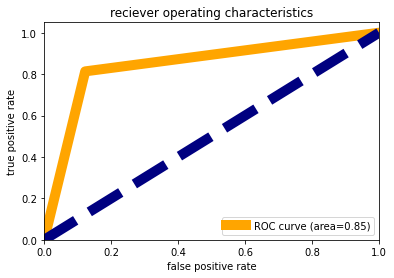

In [52]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='orange',lw=10,label="ROC curve (area=%0.2f)"%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("reciever operating characteristics")
plt.legend(loc="lower right")
plt.show()

## Decision Tree classifier

In [53]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_pred_train=dt.predict(x_train)
dt_pred_test=dt.predict(x_test)
dt_acc_train=round(accuracy_score(y_train,dt_pred_train)*100,1)
dt_acc_test=round(accuracy_score(y_test,dt_pred_test)*100,1)
print("acc train",dt_acc_train)
print("acc test",dt_acc_test)

acc train 98.7
acc test 76.3


## AUC-ROC CURVE

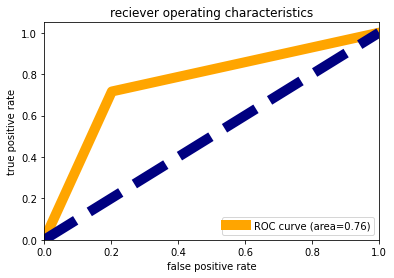

In [54]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(dt_pred_test,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='orange',lw=10,label="ROC curve (area=%0.2f)"%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("reciever operating characteristics")
plt.legend(loc="lower right")
plt.show()

## Knn Classifier

In [38]:
from sklearn.neighbors import KNeighborsClassifier
max_ac=0
randomState=0
knn=KNeighborsClassifier()
for i in range(40):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.25)
    knn.fit(x_train,y_train)
    pred_train=knn.predict(x_train)
    pred_test=knn.predict(x_test)
    
    print("\n\nAt random state:",i)
    print("\nTrain Accuracy- ",round(accuracy_score(y_train,pred_train)*100,1))
    print("\nTest Accuracy- ",round(accuracy_score(y_test,pred_test)*100,1))
        
print("\n\n Best accuracy at random state-",randomState)



At random state: 0

Train Accuracy-  85.8

Test Accuracy-  80.1


At random state: 1

Train Accuracy-  86.9

Test Accuracy-  75.0


At random state: 2

Train Accuracy-  85.5

Test Accuracy-  79.6


At random state: 3

Train Accuracy-  87.7

Test Accuracy-  79.2


At random state: 4

Train Accuracy-  84.4

Test Accuracy-  81.9


At random state: 5

Train Accuracy-  86.6

Test Accuracy-  78.2


At random state: 6

Train Accuracy-  84.3

Test Accuracy-  79.2


At random state: 7

Train Accuracy-  85.0

Test Accuracy-  82.4


At random state: 8

Train Accuracy-  86.3

Test Accuracy-  80.1


At random state: 9

Train Accuracy-  86.4

Test Accuracy-  76.4


At random state: 10

Train Accuracy-  85.6

Test Accuracy-  81.0


At random state: 11

Train Accuracy-  86.0

Test Accuracy-  77.8


At random state: 12

Train Accuracy-  87.0

Test Accuracy-  77.3


At random state: 13

Train Accuracy-  85.5

Test Accuracy-  78.7


At random state: 14

Train Accuracy-  85.5

Test Accuracy-  83.8


At 

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=14,test_size=0.20)
knn.fit(x_train,y_train)
pred_train=knn.predict(x_train)
pred_test=knn.predict(x_test)
train_acc=round(accuracy_score(y_train,pred_train)*100,1)
test_acc=round(accuracy_score(y_test,pred_test)*100,1)
print("\nTrain Accuracy- ",train_acc)
print("\nTest Accuracy- ",test_acc)


Train Accuracy-  85.4

Test Accuracy-  83.2


## AUC-ROC CURVE

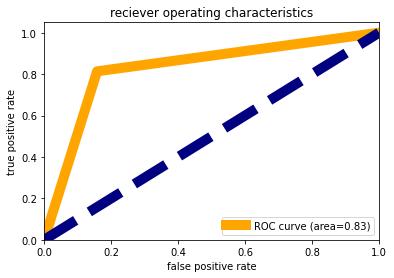

In [56]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='orange',lw=10,label="ROC curve (area=%0.2f)"%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("reciever operating characteristics")
plt.legend(loc="lower right")
plt.show()

## Best test accuracy score is given by Randon Forest Classifier so now we will perform hyper parameter tuning on it to improve accuracy

In [40]:
param_grid = {
    "n_estimators":[100,200,300],
    "max_depth":[10, 50, 100],
    "max_features":[6,8,10,12,14,16],
    'bootstrap': [True, False]
}

rf_reg = RandomForestClassifier()

rf_reg_tuned = GridSearchCV(estimator=rf_reg,
                            param_grid=param_grid,
                            cv=3,
                            n_jobs=-1,
                            verbose=2)

rf_reg_tuned.fit(x_train, y_train)
rf_reg_tuned.best_estimator_

Fitting 3 folds for each of 108 candidates, totalling 324 fits


RandomForestClassifier(max_depth=10, max_features=6, n_estimators=200)

In [44]:
rf=RandomForestClassifier(n_estimators=200,max_depth=10,max_features=6,bootstrap=True)
rf.fit(x_train,y_train)
pred_train=rf.predict(x_train)
pred_test=rf.predict(x_test)
train_acc=round(accuracy_score(y_train,pred_train)*100,1)
test_acc=round(accuracy_score(y_test,pred_test)*100,1)
print("\nTrain Accuracy- ",train_acc)
print("\nTest Accuracy- ",test_acc)


Train Accuracy-  95.8

Test Accuracy-  86.1


## Cross Validation Score

In [45]:
cv_score_best=cross_val_score(rf,x,y,cv=22).mean()*100
print("cross validation score is-",cv_score_best)
print("accuracy score for random forest regression model is-",test_acc)

cross validation score is- 82.54079254079254
accuracy score for random forest regression model is- 86.1


## So we finalise this Random Forest Classifier Model with accuracy 86.1% and save it.

## Model Saving

In [43]:
import pickle
filename = 'finalized_model.pkl'
pickle.dump(rf, open(filename, 'wb'))